In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,5)


In [47]:
trades = pd.read_csv("/content/historical_data - historical_data.csv")
sentiment = pd.read_csv("/content/fear_greed_index - fear_greed_index.csv")


In [48]:
print(trades.columns)
print(sentiment.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [49]:
# Trades dataset
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['date'] = trades['Timestamp IST'].dt.date

# Sentiment dataset
sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], errors='coerce')
sentiment['date'] = sentiment['timestamp'].dt.date


In [50]:
merged = pd.merge(
    trades,
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [51]:
# Convert to numeric safely
merged['Closed PnL'] = pd.to_numeric(merged['Closed PnL'], errors='coerce')
merged['Size USD'] = pd.to_numeric(merged['Size USD'], errors='coerce')


In [52]:
merged['is_profit'] = merged['Closed PnL'] > 0


In [53]:
merged[['Closed PnL', 'Size USD', 'is_profit']].head()


,Closed PnL,Size USD,is_profit
0,0.0,7872.16,False
1,0.0,127.68,False
2,0.0,1150.63,False
3,0.0,1142.04,False
4,0.0,69.75,False


In [54]:
merged['Closed PnL'].describe()


,Closed PnL
count,211224.000000
mean,48.749001
std,919.164828
min,-117990.104100
25%,0.000000
50%,0.000000
75%,5.792797
max,135329.090100


In [56]:
analysis_data = merged.dropna(subset=['classification'])


In [58]:
trades['trade_date'] = pd.to_datetime(
    trades['Timestamp IST'], errors='coerce'
).dt.strftime('%Y-%m-%d')


In [59]:
sentiment['sentiment_date'] = pd.to_datetime(
    sentiment['timestamp'], errors='coerce'
).dt.strftime('%Y-%m-%d')


In [60]:
trades['trade_date'].head()
sentiment['sentiment_date'].head()


,sentiment_date
0,1970-01-01
1,1970-01-01
2,1970-01-01
3,1970-01-01
4,1970-01-01


In [61]:
sentiment['timestamp'].head()


,timestamp
0,1970-01-01 00:00:01.517463000
1,1970-01-01 00:00:01.517549400
2,1970-01-01 00:00:01.517635800
3,1970-01-01 00:00:01.517722200
4,1970-01-01 00:00:01.517808600


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,5)


In [63]:
trades = pd.read_csv("/content/historical_data - historical_data.csv")
sentiment = pd.read_csv("/content/fear_greed_index - fear_greed_index.csv")


In [64]:
sentiment['timestamp'].head()


,timestamp
0,1517463000
1,1517549400
2,1517635800
3,1517722200
4,1517808600


In [65]:
sentiment['sentiment_date'] = pd.to_datetime(
    sentiment['timestamp'], unit='ms', errors='coerce'
).dt.strftime('%Y-%m-%d')


In [66]:
sentiment[['timestamp', 'sentiment_date', 'classification']].head()


,timestamp,sentiment_date,classification
0,1517463000,1970-01-18,Fear
1,1517549400,1970-01-18,Extreme Fear
2,1517635800,1970-01-18,Fear
3,1517722200,1970-01-18,Extreme Fear
4,1517808600,1970-01-18,Extreme Fear


In [67]:
sentiment['sentiment_date'] = pd.to_datetime(
    sentiment['timestamp'],
    unit='s',          # 🔥 THIS IS THE FIX
    errors='coerce'
).dt.strftime('%Y-%m-%d')


In [68]:
sentiment[['timestamp', 'sentiment_date', 'classification']].head()


,timestamp,sentiment_date,classification
0,1517463000,2018-02-01,Fear
1,1517549400,2018-02-02,Extreme Fear
2,1517635800,2018-02-03,Fear
3,1517722200,2018-02-04,Extreme Fear
4,1517808600,2018-02-05,Extreme Fear


In [69]:
trades['trade_date'] = pd.to_datetime(
    trades['Timestamp IST'], errors='coerce'
).dt.strftime('%Y-%m-%d')


In [70]:
merged = pd.merge(
    trades,
    sentiment[['sentiment_date', 'classification']],
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)


In [71]:
merged['classification'].value_counts(dropna=False)


,count
classification,
NaN,175360
Fear,13869
Greed,11292
Extreme Greed,5621
Neutral,2756
Extreme Fear,2326


In [72]:
merged['sentiment_group'] = merged['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})


In [73]:
merged['sentiment_group'].value_counts()


,count
sentiment_group,
Greed,16913
Fear,16195
Neutral,2756


In [74]:
analysis_data = merged.dropna(subset=['sentiment_group'])


In [75]:
analysis_data['sentiment_group'].value_counts()


,count
sentiment_group,
Greed,16913
Fear,16195
Neutral,2756


In [77]:
# STEP 10: Prepare final analysis dataset safely

# 1. Create a clean COPY of sentiment-matched data
analysis_data = merged.dropna(subset=['sentiment_group']).copy()

# 2. Convert numeric columns safely
analysis_data.loc[:, 'Closed PnL'] = pd.to_numeric(
    analysis_data['Closed PnL'], errors='coerce'
)

analysis_data.loc[:, 'Size USD'] = pd.to_numeric(
    analysis_data['Size USD'], errors='coerce'
)

# 3. Create profit flag
analysis_data.loc[:, 'is_profit'] = analysis_data['Closed PnL'] > 0

# 4. Final sanity check
analysis_data[['sentiment_group', 'Closed PnL', 'Size USD', 'is_profit']].head()


,sentiment_group,Closed PnL,Size USD,is_profit
0,Greed,0.0,7872.16,False
1,Greed,0.0,127.68,False
2,Greed,0.0,1150.63,False
3,Greed,0.0,1142.04,False
4,Greed,0.0,69.75,False


In [78]:
analysis_data.groupby('sentiment_group')['Closed PnL'].mean()


,Closed PnL
sentiment_group,
Fear,110.134333
Greed,104.447834
Neutral,27.088803


In [79]:
analysis_data.groupby('sentiment_group')['Closed PnL'].median()


,Closed PnL
sentiment_group,
Fear,0.0
Greed,0.0
Neutral,0.0


In [80]:
analysis_data.groupby('sentiment_group')['Size USD'].mean()


,Size USD
sentiment_group,
Fear,5511.246132
Greed,4450.397683
Neutral,4332.202906


In [81]:
analysis_data.groupby('sentiment_group')['is_profit'].mean()


,is_profit
sentiment_group,
Fear,0.369003
Greed,0.474783
Neutral,0.494920


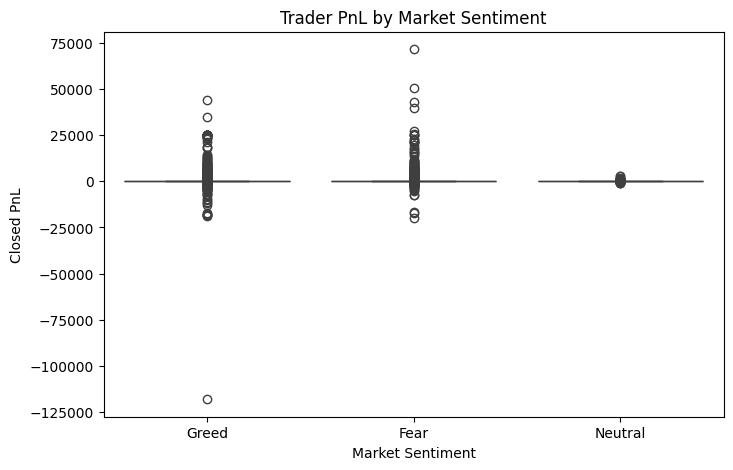

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x='sentiment_group',
    y='Closed PnL',
    data=analysis_data
)
plt.title("Trader PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()
